In [2]:
import pandas as pd
df = pd.read_csv('./done_data/new_house_merge.csv')
print(df.columns)
print(df.shape)
df.head(1)

Index(['鄉鎮市區', '土地移轉總面積平方公尺', '都市土地使用分區', '總樓層數', '主要用途', '主要建材',
       '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間',
       '有無管理組織', '總價元', '車位類別', '車位移轉總面積平方公尺', '土地', '建物', '車位', '轉移樓層',
       '建物類型', 'Area', 'EightCount', 'ParkCount', 'FuneralCount', 'GasCount',
       'CrimeCount', 'PoliceCount', 'busCount', 'subwayCount', 'govCount',
       'clinicCount', 'hospitalCount', 'pharmacyCount', 'fireareaCount',
       'firewayCount', '土地面積', '總人口數', '男性人數', '女性人數', '人口密度', '每戶人數',
       '每戶成年人數', '所得收入總計', '可支配所得', '消費支出', '儲蓄', '所得總額'],
      dtype='object')
(5252, 47)


,鄉鎮市區,土地移轉總面積平方公尺,都市土地使用分區,總樓層數,主要用途,主要建材,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,中正區,18.51,住,13,住家用,混凝土造,152.07,3,2,2,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842


In [3]:
# 移除無法線性化的特徵

df = df.drop(['Area','鄉鎮市區','都市土地使用分區','主要用途','主要建材','建物現況格局-隔間','有無管理組織','車位類別','建物類型'], axis = 1)

df.head()

,土地移轉總面積平方公尺,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,車位移轉總面積平方公尺,土地,建物,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,18.51,13,152.07,3,2,2,40000000,24.62,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
1,15.38,10,119.64,1,1,1,26300000,44.37,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
2,17.04,10,127.79,1,1,1,26150000,44.37,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
3,16.90,10,83.42,1,1,1,23920000,0.00,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
4,17.04,10,127.79,1,1,1,27150000,44.38,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842


In [4]:
# 先使用z-score來進行正規化
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(df)
df_scaler = scaler.transform(df)
df = pd.DataFrame(df_scaler, columns = df.columns)
df.head()

,土地移轉總面積平方公尺,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,車位移轉總面積平方公尺,土地,建物,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,-0.141137,-0.187618,-0.095284,0.875359,0.867513,0.864881,0.094125,-0.275967,-0.242034,0.0,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
1,-0.164097,-0.727054,-0.416484,-0.717912,-0.406942,-0.359804,-0.263362,0.416425,-0.242034,0.0,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
2,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,-0.267276,0.416425,-0.242034,0.0,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
3,-0.152947,-0.727054,-0.775223,-0.717912,-0.406942,-0.359804,-0.325465,-1.139089,-0.242034,0.0,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
4,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,-0.241182,0.416775,-0.242034,0.0,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185


In [5]:
# 將x,y拆開
y_df = df['總價元']
x_df = df.drop(['總價元'], axis = 1)
x_df.head()

,土地移轉總面積平方公尺,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,土地,建物,車位,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,-0.141137,-0.187618,-0.095284,0.875359,0.867513,0.864881,-0.275967,-0.242034,0.0,-0.034449,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
1,-0.164097,-0.727054,-0.416484,-0.717912,-0.406942,-0.359804,0.416425,-0.242034,0.0,-0.034449,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
2,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,0.416425,-0.242034,0.0,-0.034449,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
3,-0.152947,-0.727054,-0.775223,-0.717912,-0.406942,-0.359804,-1.139089,-0.242034,0.0,-1.355064,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
4,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,0.416775,-0.242034,0.0,-0.034449,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185


In [6]:
# 利用方差先找出沒有差距的特徵，發現建物並沒有足夠變異
# 0.25是以某個值不超過0.5計算，0.5X0.5=0.25
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.25)
selector.fit_transform(x_df)
cols = selector.get_support(indices=True)

features_df_new = x_df.iloc[:,cols].columns
new_feature_list = features_df_new.tolist()
print(len(new_feature_list))
print(new_feature_list)

36
['土地移轉總面積平方公尺', '總樓層數', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '車位移轉總面積平方公尺', '土地', '車位', '轉移樓層', 'EightCount', 'ParkCount', 'FuneralCount', 'GasCount', 'CrimeCount', 'PoliceCount', 'busCount', 'subwayCount', 'govCount', 'clinicCount', 'hospitalCount', 'pharmacyCount', 'fireareaCount', 'firewayCount', '土地面積', '總人口數', '男性人數', '女性人數', '人口密度', '每戶人數', '每戶成年人數', '所得收入總計', '可支配所得', '消費支出', '儲蓄', '所得總額']


In [7]:
# 只選擇有足夠變異的變數
x_df = x_df[new_feature_list]
x_df.head()

,土地移轉總面積平方公尺,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,土地,車位,轉移樓層,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,-0.141137,-0.187618,-0.095284,0.875359,0.867513,0.864881,-0.275967,-0.242034,-0.034449,0.461296,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
1,-0.164097,-0.727054,-0.416484,-0.717912,-0.406942,-0.359804,0.416425,-0.242034,-0.034449,-1.183741,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
2,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,0.416425,-0.242034,-0.034449,-0.978111,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
3,-0.152947,-0.727054,-0.775223,-0.717912,-0.406942,-0.359804,-1.139089,-0.242034,-1.355064,-0.772482,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185
4,-0.151920,-0.727054,-0.335763,-0.717912,-0.406942,-0.359804,0.416775,-0.242034,-0.034449,-0.566852,...,-1.442382,-1.391527,1.005934,-1.73553,-2.035369,0.604897,0.783695,0.566039,0.429162,0.814185


In [8]:
# 利用Kbest中的相關係數找出比較有代表性的10個特徵
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector_k = SelectKBest(f_regression,k = 'all')
selector_k_fit = selector_k.fit(x_df, y_df)
selector_k.transform(x_df) # not needed to get the score

cols_k = selector_k.get_support(indices=True)
socre_k_list = selector_k_fit.scores_.tolist()
features_df_k = x_df.iloc[:,cols_k.tolist()].columns
k_feature_list = features_df_k.tolist()

# python3的zip只會出zip檔，要出list()才能顯示
# 把得分表弄成dataFrame
feature_scores = zip(k_feature_list,socre_k_list)
feature_scores_df = pd.DataFrame(list(feature_scores),columns=['features', 'scores'])
feature_scores_df.head()

,features,scores
0,土地移轉總面積平方公尺,5.551308
1,總樓層數,579.041915
2,建物移轉總面積平方公尺,14780.895546
3,建物現況格局-房,47.087389
4,建物現況格局-廳,0.057758


In [9]:
# 確認各個特徵的得分狀況，建議從得分200進行切割
feature_scores_df = feature_scores_df.sort_values(by=['scores'], ascending=False)
feature_scores_df.head(15)

,features,scores
2,建物移轉總面積平方公尺,14780.895546
8,車位,3406.632391
6,車位移轉總面積平方公尺,3254.430518
1,總樓層數,579.041915
9,轉移樓層,306.454635
19,clinicCount,283.282188
35,所得總額,268.331137
31,所得收入總計,267.318585
22,fireareaCount,253.641137
32,可支配所得,234.518960


In [10]:
feature_scores_df = feature_scores_df[feature_scores_df['scores'] > 200]
feature_reg = feature_scores_df['features'].tolist()
x_df = x_df[feature_reg]
print(x_df.shape,y_df.shape)
x_df.head()

(5252, 10) (5252,)


,建物移轉總面積平方公尺,車位,車位移轉總面積平方公尺,總樓層數,轉移樓層,clinicCount,所得總額,所得收入總計,fireareaCount,可支配所得
0,-0.095284,-0.034449,-0.275967,-0.187618,0.461296,-0.026582,0.814185,0.604897,0.336,0.783695
1,-0.416484,-0.034449,0.416425,-0.727054,-1.183741,-0.026582,0.814185,0.604897,0.336,0.783695
2,-0.335763,-0.034449,0.416425,-0.727054,-0.978111,-0.026582,0.814185,0.604897,0.336,0.783695
3,-0.775223,-1.355064,-1.139089,-0.727054,-0.772482,-0.026582,0.814185,0.604897,0.336,0.783695
4,-0.335763,-0.034449,0.416775,-0.727054,-0.566852,-0.026582,0.814185,0.604897,0.336,0.783695


## Let's build our Regression Model

### Polynomial

class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Poly_score = []

for d in range(1,5):
    poly = PolynomialFeatures(degree = d)
    x_df_poly = poly.fit_transform(x_df)
    X_train, X_test, y_train, y_test = train_test_split(x_df_poly, y_df,random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    Poly_score.append([d,linreg.score(X_train, y_train),linreg.score(X_test, y_test)])
pd.DataFrame(Poly_score, columns=['Degree','R2(Training)','R2 (Test)'])

,Degree,R2(Training),R2 (Test)
0,1,0.815820,0.832595
1,2,0.960739,0.959093
2,3,0.983762,0.977794
3,4,0.992707,0.652848


### Lasso

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [12]:
import numpy as np
from sklearn.linear_model import Ridge

ridge_score = []

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)

count = np.linspace(0,2000,50)

for alpha in count:
    linridge = Ridge(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    ridge_score.append([alpha,linridge.score(X_train, y_train),linridge.score(X_test, y_test)])
    
ridge_score_df = pd.DataFrame(ridge_score, columns=['alpha','R2(Training)','R2 (Test)'])
ridge_score_df.head()

,alpha,R2(Training),R2 (Test)
0,0.000000,0.815820,0.832595
1,40.816327,0.813528,0.828131
2,81.632653,0.810602,0.823877
3,122.448980,0.807127,0.819311
4,163.265306,0.803309,0.814554


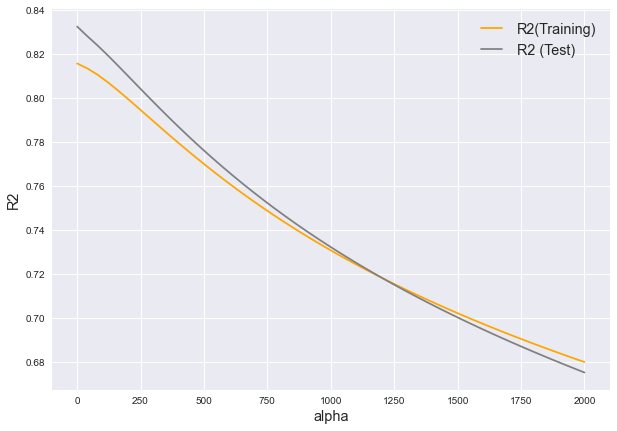

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(ridge_score_df['alpha'], ridge_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(ridge_score_df['alpha'], ridge_score_df['R2 (Test)'], color='gray',label = 'R2 (Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('alpha',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

### SVR

class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [124]:
import numpy as np
from sklearn.svm import SVR
svr_score = []

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)

count = np.linspace(0.01,0.1,50)

for g in count:
    svr_model = SVR(kernel='rbf', gamma=g).fit(X_train, y_train)
    svr_score.append([g,svr_model.score(X_train, y_train),svr_model.score(X_test, y_test)])
    
svr_score_df = pd.DataFrame(svr_score, columns=['gamma','R2(Training)','R2 (Test)'])
svr_score_df.head()

,gamma,R2(Training),R2 (Test)
0,0.010000,0.868158,0.871363
1,0.011837,0.877575,0.881037
2,0.013673,0.884285,0.887262
3,0.015510,0.890217,0.892668
4,0.017347,0.895423,0.897026


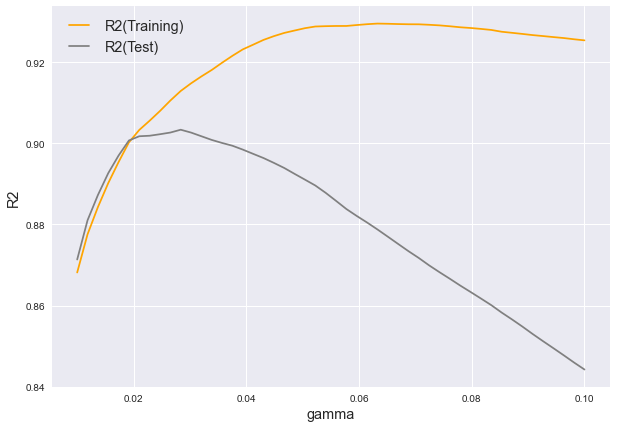

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(svr_score_df['gamma'], svr_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(svr_score_df['gamma'], svr_score_df['R2 (Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('gamma',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [118]:
import numpy as np
from sklearn.svm import SVR
svr_score_c = []

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)

count = np.linspace(1,15,30)

for c in count:
    svr_model_c = SVR(kernel='rbf', C=c).fit(X_train, y_train)
    svr_score_c.append([c,svr_model_c.score(X_train, y_train),svr_model_c.score(X_test, y_test)])
    
svr_score_c_df = pd.DataFrame(svr_score_c, columns=['C','R2(Training)','R2(Test)'])
svr_score_c_df.head()

,C,R2(Training),R2(Test)
0,1.000000,0.925361,0.843704
1,1.482759,0.951074,0.869503
2,1.965517,0.957048,0.879244
3,2.448276,0.961303,0.886217
4,2.931034,0.964483,0.891928


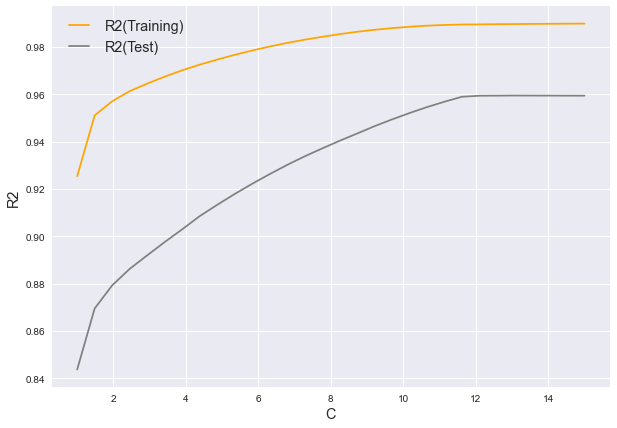

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(svr_score_c_df['C'], svr_score_c_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(svr_score_c_df['C'], svr_score_c_df['R2(Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('C',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [126]:
# 找出最佳解答
import numpy as np
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)
svr_model_r = SVR(kernel='rbf', gamma = 0.02, C = 12).fit(X_train, y_train)
print([svr_model_r.score(X_train, y_train),svr_model_r.score(X_test, y_test)])

[0.971970387228812, 0.9671002467994216]


### Random Forest

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [14]:
from sklearn.ensemble import RandomForestRegressor

RFG_score = []

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)

for n in range(1,100):
    RFG = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    r2_train = RFG.score(X_train, y_train)
    r2_test = RFG.score(X_test, y_test)
    RFG_score.append([n,RFG.score(X_train, y_train),RFG.score(X_test, y_test)])

RFG_score_df = pd.DataFrame(RFG_score, columns=['n_estimators','R2(Training)','R2 (Test)'])
RFG_score_df.head()

,n_estimators,R2(Training),R2 (Test)
0,1,0.985946,0.977887
1,2,0.962908,0.953104
2,3,0.989984,0.972692
3,4,0.995775,0.982097
4,5,0.994142,0.981727


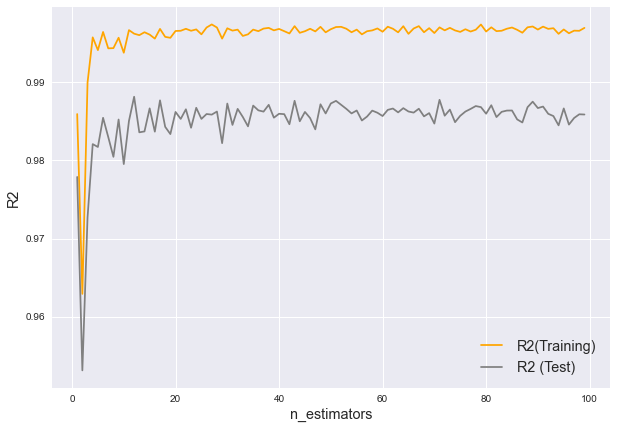

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(RFG_score_df['n_estimators'], RFG_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(RFG_score_df['n_estimators'], RFG_score_df['R2 (Test)'], color='gray',label = 'R2 (Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('n_estimators',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

### GradientBoostingRegressor

class sklearn.ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_score = []

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,random_state = 0)

for n in range(1,100):
    GBR = GradientBoostingRegressor(n_estimators=n).fit(X_train, y_train)
    r2_train = GBR.score(X_train, y_train)
    r2_test = GBR.score(X_test, y_test)
    GBR_score.append([n,GBR.score(X_train, y_train),GBR.score(X_test, y_test)])

GBR_score_df = pd.DataFrame(GBR_score, columns=['n_estimators','R2(Training)','R2 (Test)'])
GBR_score_df.tail(10)

,n_estimators,R2(Training),R2 (Test)
89,90,0.981717,0.975414
90,91,0.981846,0.974910
91,92,0.981980,0.975398
92,93,0.982030,0.975372
93,94,0.982105,0.974921
94,95,0.982171,0.974578
95,96,0.982362,0.975563
96,97,0.982600,0.975754
97,98,0.982672,0.976029
98,99,0.982785,0.976350


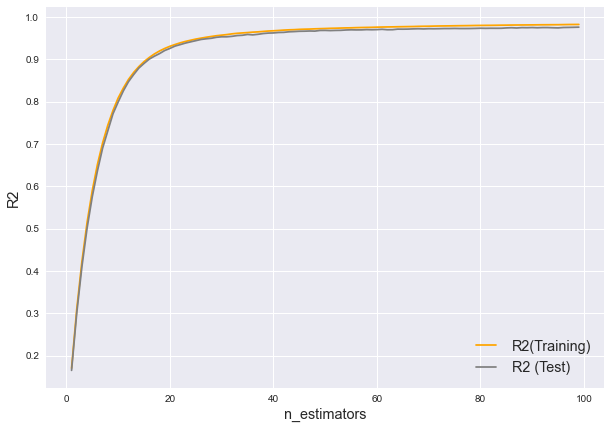

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(GBR_score_df['n_estimators'], GBR_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(GBR_score_df['n_estimators'], GBR_score_df['R2 (Test)'], color='gray',label = 'R2 (Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('n_estimators',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

### K_fold來確認模型得分

In [127]:
# 交叉比對，分為K摺來進行每個模型的比對
from sklearn.model_selection import cross_val_score
result = []

x_df_poly = PolynomialFeatures(degree = 3).fit_transform(x_df)
linreg = LinearRegression()
linridge = Ridge(alpha, max_iter = 10000)
SVR = SVR(kernel='rbf', gamma = 0.02, C = 12)
RFG = RandomForestRegressor(n_estimators = 5)
GBR = GradientBoostingRegressor(n_estimators = 42)

k_models = ['linreg','linridge','SVR','RFG','GBR']

for k in range(2,20):
    cross_val_list = []
    cross_val_list.append(np.mean(cross_val_score(linreg, x_df_poly, y_df, cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(linridge, x_df, y_df, cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(SVR, x_df, y_df, cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(RFG, x_df, y_df, cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(GBR, x_df, y_df, cv = k).tolist()))
    result.append(cross_val_list)
kfold_df = pd.DataFrame(result, index = range(2,20), columns = k_models)
kfold_df.head()

,linreg,linridge,SVR,RFG,GBR
2,-8.482485e+15,0.577562,0.781613,0.792930,0.871757
3,-1.616369e+17,0.565116,0.651317,0.802379,0.835848
4,-1.036609e+13,0.597747,0.669011,0.804520,0.846885
5,-1.002885e+17,0.581831,0.746921,0.804053,0.821312
6,-7.119162e+12,0.619603,0.706322,0.833583,0.857764


Text(0.5, 1.0, 'K-fold for each Models')

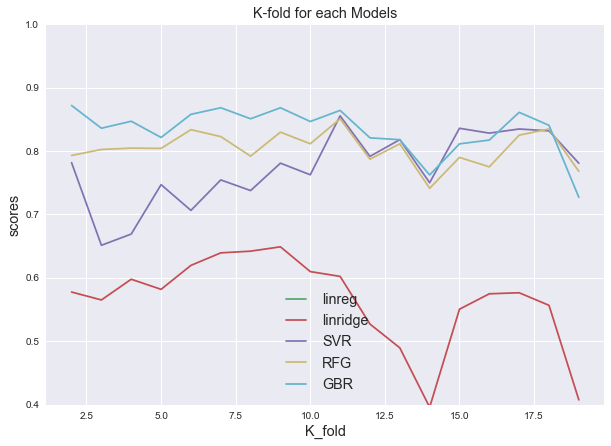

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
for i in range(0,len(k_models)):
    plt.plot(kfold_df.index.tolist(), kfold_df[k_models[i]], color='C{}'.format(i+1),label = k_models[i])

plt.ylim(0.4,1)
plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('K_fold',fontsize = 'x-large')
plt.ylabel('scores',fontsize = 'x-large');
plt.title('K-fold for each Models',fontsize = 'x-large')